In [1]:
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, silhouette_score, silhouette_samples
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.utils import compute_sample_weight
from sklearn.metrics import mean_squared_error
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, InterclusterDistance, SilhouetteVisualizer
from sklearn.mixture import GaussianMixture
from scipy.stats import describe, kurtosis
from sklearn.decomposition import FastICA, PCA
from sklearn import random_projection
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from plot_learning_curve import plot_learning_curve, plot_validation_curve

None


In [2]:
random_seed = 42
np.random.seed(random_seed)

In [3]:
credit_train = pd.read_csv("credit-a.tsv", sep = "\t")
credit_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,2,156,0.000,2,1,13,8,1.25,1,1,1.0,0,0,42,0.0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6.0,0,0,118,560.0,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0.0,0,0,74,824.0,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5.0,1,0,1,3.0,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0.0,0,2,8,0.0,0


In [4]:
credit_train = pd.get_dummies(credit_train, columns=['A1', 'A4', 'A5', 'A7', 'A9', 'A10', 'A12', 'A13'])
credit_train.shape

(690, 38)

In [5]:
normalize_columns = ['A2', 'A3', 'A6','A8', 'A11', 'A14']
def normalize(columns):
  scaler = preprocessing.StandardScaler()
  credit_train[columns] = scaler.fit_transform(credit_train[columns])
normalize(normalize_columns)

In [6]:
X_c = credit_train[[c for c in credit_train.columns if c != 'target']]
y_c = credit_train['target']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_c, y_c, test_size=0.3, stratify=y_c, random_state=random_seed)

In [7]:
X_train_c.shape

(483, 37)

### KMeans

In [8]:
k_grid_c = np.arange(2, 45, 2)
loss2 = np.zeros(k_grid_c.size)
sil_score2 = np.zeros(k_grid_c.size)
for idx, k in enumerate(k_grid_c):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed, n_jobs=-1)
    kmeans.fit(X_train_c)
    labels_c=kmeans.predict(X_train_c)
    loss2[idx] = kmeans.inertia_
    sil_score2[idx] = silhouette_score(X_train_c, labels_c, metric='euclidean')
    #kmeans.fit(X2)
    #loss2[idx] = kmeans.inertia_

k =  2
k =  4
k =  6


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  8
k =  10


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  12
k = 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


 14
k =  16


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  18
k =  20


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  22
k =  24


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  26
k = 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


 28
k = 

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


 30


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  32


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  34


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  36


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  38


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  40


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  42


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


k =  44


D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


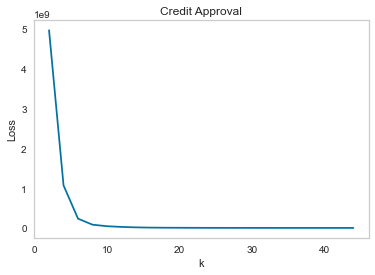

In [9]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid_c, loss2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('Credit Approval')
plt.grid()

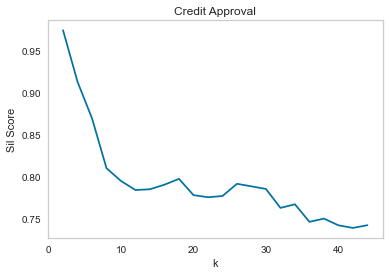

In [10]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(k_grid_c, sil_score2)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Sil Score')
plt.title('Credit Approval')
plt.grid()

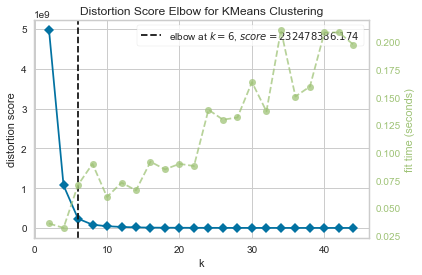

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [11]:
model_c = KMeans(random_state=random_seed)
visualizer_c = KElbowVisualizer(model_c, k=k_grid_c)

visualizer_c.fit(X_train_c)
visualizer_c.show() 

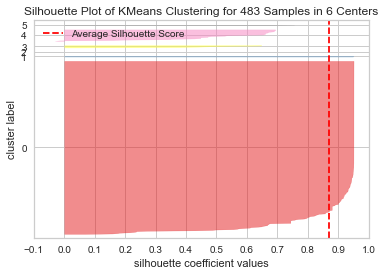

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 483 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [12]:
s_viz_c = SilhouetteVisualizer(KMeans(n_clusters=6, random_state=random_seed))
s_viz_c.fit(X_train_c)
s_viz_c.show()

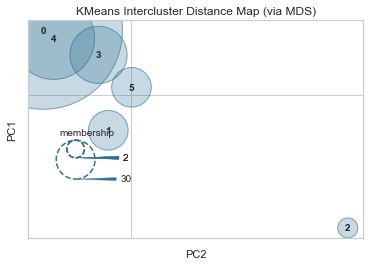

In [13]:
kmeans = KMeans(n_clusters=6, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_train_c)
visualizer.finalize()

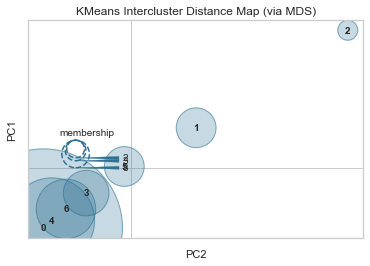

In [14]:
kmeans = KMeans(n_clusters=7, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_train_c)
visualizer.finalize()

In [15]:
kmeans = KMeans(n_clusters=6, random_state=random_seed, n_jobs=-1)
kmeans.fit(X_train_c)
labels_c=kmeans.predict(X_train_c)
metrics.fowlkes_mallows_score(y_train_c, labels_c)

D:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


0.6676478674102774

In [16]:
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=random_seed)
y_kmeans = kmeans.fit_predict(X_train_c)

In [17]:
X_train_c.shape

(483, 37)

In [18]:
y_kmeans.shape

(483,)

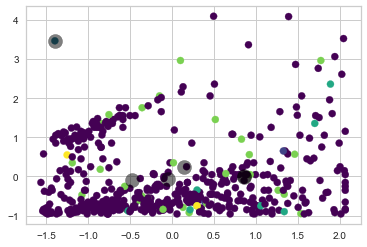

In [19]:
plt.scatter(X_train_c.iloc[:, 0], X_train_c.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [20]:
round(adjusted_rand_score(y_train_c, labels_c), 2)

0.05

### Expectation Maximization (EM)

In [21]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [22]:
n_clusters=np.arange(2, 20)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2, random_state=random_seed).fit(X_train_c) 
        
        tmp_bic.append(gmm.bic(X_train_c))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

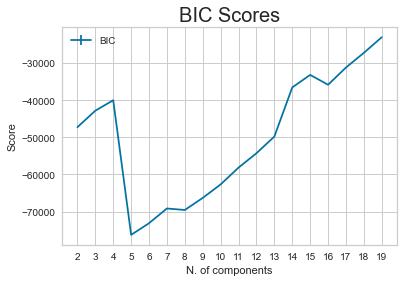

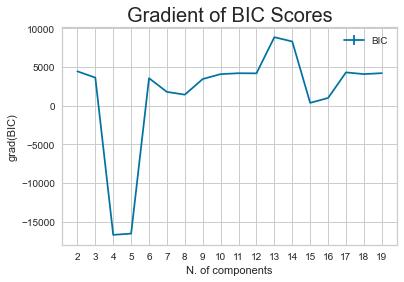

<Figure size 432x288 with 0 Axes>

In [23]:
plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters, np.gradient(bics), yerr=bics_err, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [24]:
#EM Validation method
n=5
gmm=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_train_c)
y_gmm = gmm.fit_predict(X_train_c)

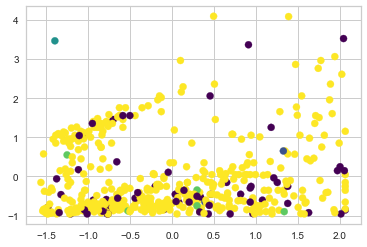

In [25]:
plt.scatter(X_train_c.iloc[:, 0], X_train_c.iloc[:, 1], c=y_gmm, s=50, cmap='viridis')

In [26]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    print (covariance.shape)
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    plt.title("GMM with %d components"%len(gmm.means_), fontsize=(20))
    plt.xlabel("U.A.")
    plt.ylabel("U.A.")

### PCA

In [28]:
pca = PCA(
    n_components=None,
    random_state=random_seed,
)
pca.fit(X_train_c)
pca.explained_variance_ratio_

array([9.99999752e-01, 5.12837107e-08, 3.14621541e-08, 2.73344994e-08,
       2.53578943e-08, 2.08889834e-08, 1.85833755e-08, 1.40033989e-08,
       1.20519229e-08, 1.13321413e-08, 9.47169991e-09, 7.72814577e-09,
       6.81040245e-09, 3.40170096e-09, 2.91918371e-09, 1.83490301e-09,
       1.20560475e-09, 5.20374730e-10, 4.35442109e-10, 2.54876749e-10,
       1.79501866e-10, 1.50389952e-10, 1.42287551e-10, 9.52886368e-11,
       4.92500673e-11, 2.76456674e-11, 9.98203584e-33, 9.98203584e-33,
       9.98203584e-33, 9.98203584e-33, 9.98203584e-33, 9.98203584e-33,
       9.98203584e-33, 9.98203584e-33, 9.98203584e-33, 9.98203584e-33,
       9.98203584e-33])

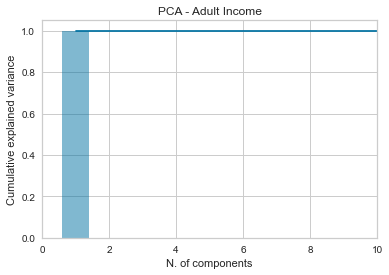

In [29]:
plt.bar(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, 
        align='center', alpha=0.5, label='Individual explained variance')
plt.step(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_), 
        where='mid', label='Cumulative explained variance')
plt.xlim([0, 10])
plt.xlabel('N. of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Adult Income")
plt.show()

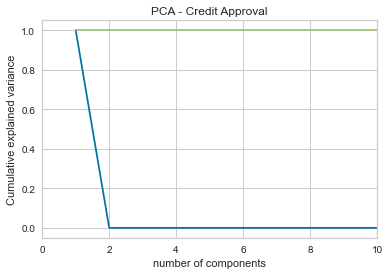

In [30]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label='Individual explained variance')
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
#plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('number of components')
plt.ylabel('Cumulative explained variance')
plt.title("PCA - Credit Approval")
plt.xlim([0, 10])
plt.show()

Text(0.5, 1.0, 'PCA - Credit Approval')

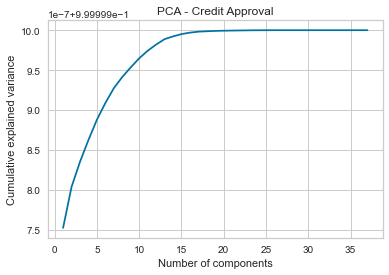

In [31]:
#plt.plot(range(1, pca.n_components_ + 1), np.cumsum(pca.explained_variance_ratio_))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label='Cumulative explained variance')
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title("PCA - Credit Approval")
#plt.axvline(2, linestyle='--', color='k', alpha=0.5)

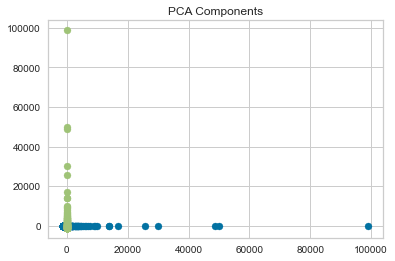

In [32]:
n = 2
pca = PCA(n_components=n, random_state=random_seed) 
X_pca=pca.fit_transform(X_train_c)

plt.figure(figsize=(6,4))
plt.title('PCA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_pca[:,i], X_pca[:,j])

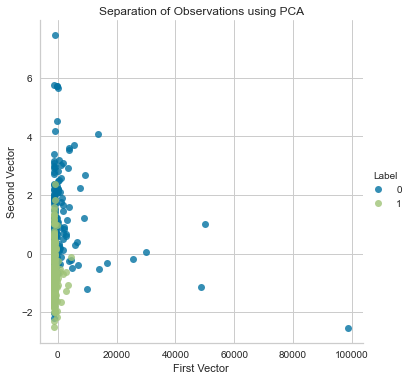

In [33]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

X_train_PCA = pd.DataFrame(data=X_pca, index=X_train_c.index)
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, \
                                   index=X_train_c.index)

scatterPlot(X_train_PCA, y_train_c, "PCA")

### ICA 

In [34]:
component_counts = np.arange(2, 38)
total_kurtosis = {}

for component_count in component_counts:
    tmp_ica = FastICA(
        random_state=random_seed,
        n_components=component_count,
    )
    tmp_X_tr = tmp_ica.fit_transform(X_train_c)
    total_kurtosis[component_count] = (np.abs(kurtosis(tmp_X_tr, axis=0)).sum())/component_count

print(total_kurtosis)

{2: 82.06299942839989, 3: 54.79218461661831, 4: 44.36394639070925, 5: 35.741143187483615, 6: 31.69993795833048, 7: 27.558905865801364, 8: 24.877295887243964, 9: 23.335094176796172, 10: 22.406576376823544, 11: 23.733156556964502, 12: 21.963983076771402, 13: 23.406241031594337, 14: 22.38304260364172, 15: 21.02181854544302, 16: 20.55566752671335, 17: 24.798115564454548, 18: 27.345739910985728, 19: 28.688295951597063, 20: 32.17065378949944, 21: 37.362779439464894, 22: 44.204752832084196, 23: 49.01042953358258, 24: 58.44450899468033, 25: 69.32582496620029, 26: 98.2787737287903, 27: 112.2869260294214, 28: 108.2957607226276, 29: 104.92229780766446, 30: 85.24234691343008, 31: 128.61871262076545, 32: 97.16451615350175, 33: 80.7993174195672, 34: 99.0530900136698, 35: 90.02108075377103, 36: 84.53547503936645, 37: 95.06995434862458}


[]

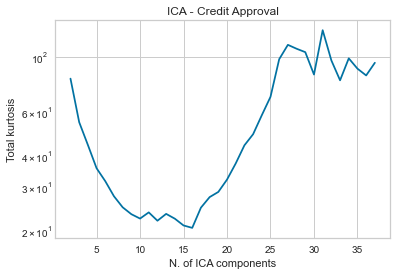

In [35]:
pd.Series(total_kurtosis).plot()
plt.ylabel('Total kurtosis')
plt.xlabel('N. of ICA components')
plt.title('ICA - Credit Approval')
plt.semilogy()

In [36]:
ica10 = FastICA(
    random_state=random_seed,
    n_components=38, max_iter=1000)
X_tr10 = ica10.fit_transform(X_train_c)
kurt_df10 = pd.DataFrame(kurtosis(X_tr10, axis=0), columns=['kurtosis'])
#kurt_df10.sort_values(by='kurtosis', ascending=False)


D:\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:468: UserWarning: n_components is too large: it will be set to 37
  warnings.warn(


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

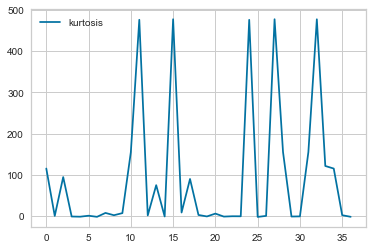

In [37]:
plt.figure()
kurt_df10.plot()

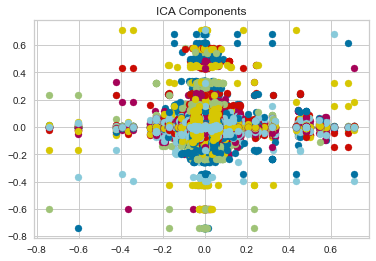

In [38]:
n = 31
ica = FastICA(n_components=n, max_iter=10000, tol=0.1, random_state=random_seed) 
X_ica=ica.fit_transform(X_train_c)

plt.figure(figsize=(6,4))
plt.title('ICA Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_ica[:,i], X_ica[:,j])

Text(0, 0.5, 'ICA2')

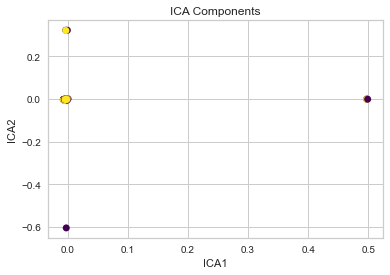

In [39]:
colors = np.random.rand(31)

plt.figure(figsize=(6,4))
plt.title('ICA Components')
plt.scatter(X_ica[:,0], X_ica[:,1], c= y_train_c.to_numpy(), cmap = 'viridis', edgecolors='None', alpha=1)
plt.xlabel('ICA1')
plt.ylabel('ICA2')

In [40]:
# X_train_ICA = pd.DataFrame(data=X_ica, index=X_train_c.index)
# print (X_train_ICA.shape)
# X_train_ICA_inverse = ica.inverse_transform(X_train_ICA)
# X_train_ICA_inverse = pd.DataFrame(data=X_train_ICA_inverse, \
#                                    index=X_train_c.index)

# scatterPlot(X_train_ICA, y_train_c, "ICA")

### Randomized Projections Sparse 

In [41]:
best_n = (0, 0)
for i in range(2, 38):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=random_seed).fit(X_train_c)
    X_rp = rp.fit_transform(X_train_c)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_c, test_size=0.2, random_state=random_seed)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3, random_state=random_seed)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=random_seed).fit(X_train_c)
X_rp = rp.fit_transform(X_train_c)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_c, test_size=0.2, random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 32
Test Accuracy: 0.8762886597938144


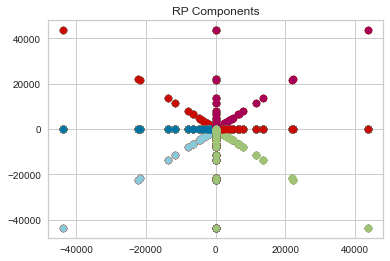

In [42]:
n = 32
rps = random_projection.SparseRandomProjection(n_components=n, random_state=random_seed)
X_rps=rps.fit_transform(X_train_c)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

### Randomized Projection Gaussian

In [43]:
best_n = (0, 0)
for i in range(2, 38):
    rp = random_projection.GaussianRandomProjection(n_components=i, random_state=random_seed).fit(X_train_c)
    X_rp = rp.fit_transform(X_train_c)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_c, test_size=0.3,random_state=random_seed)
    clf = DecisionTreeClassifier(max_depth = 26, min_samples_leaf = 3, random_state=random_seed)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.GaussianRandomProjection(n_components=best_n[0], random_state=random_seed).fit(X_train_c)
X_rp = rp.fit_transform(X_train_c)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y_train_c, test_size=0.3, random_state=random_seed)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Best n_components: 13
Test Accuracy: 0.6689655172413793


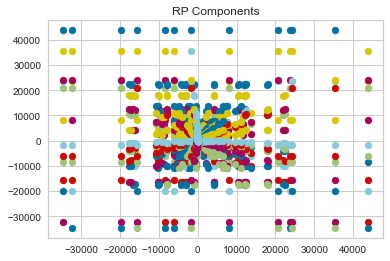

In [44]:
n = 13
rpg = random_projection.GaussianRandomProjection(n_components=n, random_state=random_seed)
X_rpg=rpg.fit_transform(X_train_c)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

In [45]:
print (X_train_c.shape)
n_c = np.arange(2,38)
loss_r = np.zeros(n_c.size)
for idx, i in enumerate(n_c):
    rp = random_projection.GaussianRandomProjection(n_components=i, random_state=random_seed)#.fit(X_train_c)
    X_rp = rp.fit_transform(X_train_c)
    inverse_data = np.linalg.pinv(rp.components_.T)
    reconstructed_data = X_rp.dot(inverse_data)
    loss_r[idx] = mean_squared_error(X_train_c,reconstructed_data)

(483, 37)


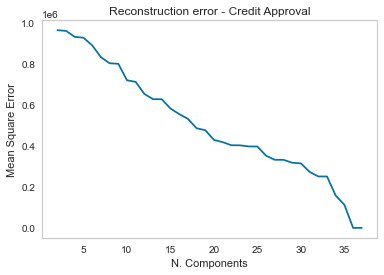

In [46]:
# Plot loss vs k to find best k
plt.figure()
plt.plot(n_c, loss_r)
# plt.xticks(k_grid)
plt.xlabel('N. Components')
plt.ylabel('Mean Square Error')
plt.title('Reconstruction error - Credit Approval')
plt.grid()

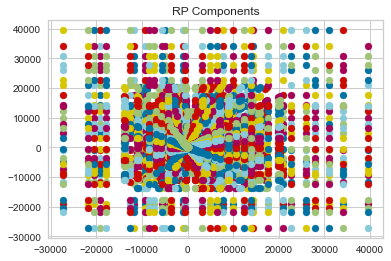

In [47]:
n = 32
rpg = random_projection.GaussianRandomProjection(n_components=n, random_state=random_seed)
X_rpg=rpg.fit_transform(X_train_c)

plt.figure(figsize=(6,4))
plt.title('RP Components')

for i in range(0, n):
    for j in range(0, n):
        if i == j:
            continue
        plt.scatter(X_rp[:,i], X_rp[:,j])

## KMeans + DR 

### KMeans + PCA 

In [48]:
# n = 2
# pca = PCA(n_components=n, random_state=random_seed) 
# X_pca=pca.fit_transform(X_train_c)

k_grid_pca = np.arange(2, 6, 1)
loss_pca = np.zeros(k_grid_pca.size)
sil_score_pca = np.zeros(k_grid_pca.size)
for idx, k in enumerate(k_grid_pca):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_pca)
    labels_pca=kmeans.predict(X_pca)
    loss_pca[idx] = kmeans.inertia_
    sil_score_pca[idx] = silhouette_score(X_pca, labels_pca, metric='euclidean')

k =  2
k =  3
k =  4
k =  5


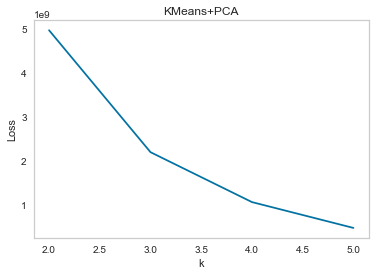

In [49]:
plt.figure()
plt.plot(k_grid_pca, loss_pca)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+PCA')
plt.grid()

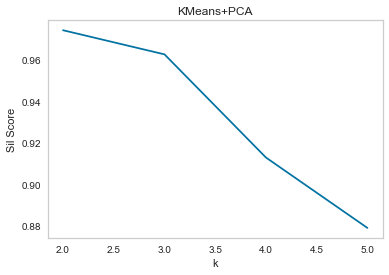

In [50]:
plt.figure()
plt.plot(k_grid_pca, sil_score_pca)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Sil Score')
plt.title('KMeans+PCA')
plt.grid()

D:\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
D:\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


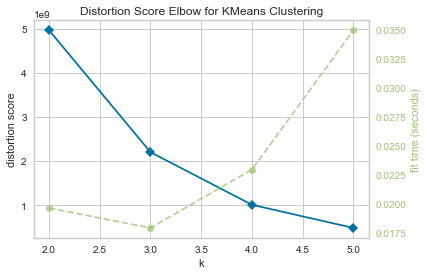

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
model_pca = KMeans()
visualizer_pca = KElbowVisualizer(model_pca, k=k_grid_pca)

visualizer_pca.fit(X_pca)
visualizer_pca.show() 

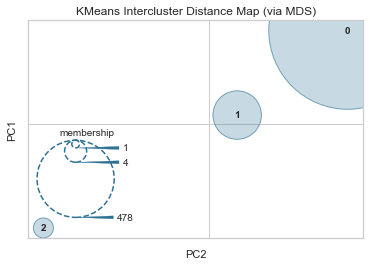

In [54]:
kmeans = KMeans(n_clusters=3, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_pca)
visualizer.finalize()

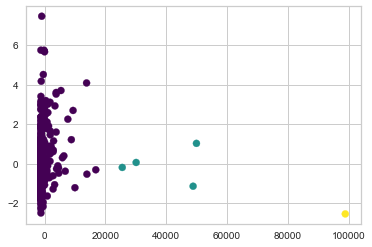

In [55]:
labels_pca=kmeans.predict(X_pca)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, s=50, cmap='viridis')

### KMeans + ICA

In [56]:
k_grid_ica = np.arange(2, 32, 1)
loss_ica = np.zeros(k_grid_ica.size)
sil_score_ica = np.zeros(k_grid_ica.size)
for idx, k in enumerate(k_grid_ica):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_ica)
    labels_ica=kmeans.predict(X_ica)
    loss_ica[idx] = kmeans.inertia_
    sil_score_ica[idx] = silhouette_score(X_ica, labels_ica, metric='euclidean')

k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
k =  17
k =  18
k =  19
k =  20
k =  21
k =  22
k =  23
k =  24
k =  25
k =  26
k =  27
k =  28
k =  29
k =  30
k =  31


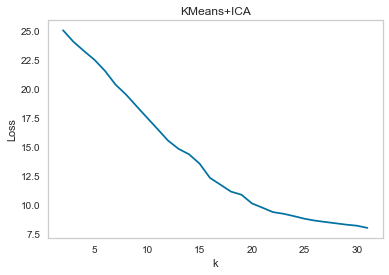

In [57]:
plt.figure()
plt.plot(k_grid_ica, loss_ica)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+ICA')
plt.grid()

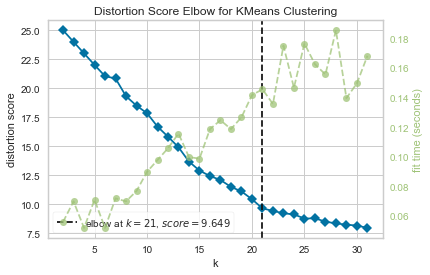

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [58]:
model_ica = KMeans()
visualizer_ica = KElbowVisualizer(model_ica, k=k_grid_ica)

visualizer_ica.fit(X_ica)
visualizer_ica.show()

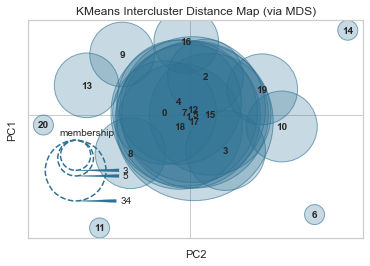

In [59]:
kmeans = KMeans(n_clusters=21, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_ica)
visualizer.finalize()

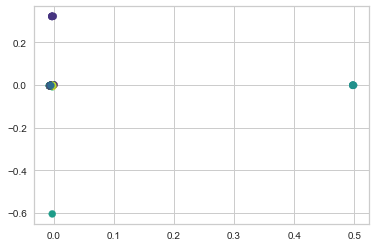

In [60]:
labels_ica=kmeans.predict(X_ica)
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=labels_ica, s=50, cmap='viridis')

### KMeans + RP Sparse 

In [61]:
k_grid_rps = np.arange(2, 38, 2)
loss_rps = np.zeros(k_grid_rps.size)
sil_score_rps = np.zeros(k_grid_rps.size)
for idx, k in enumerate(k_grid_rps):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_rps)
    labels_rps=kmeans.predict(X_rps)
    loss_rps[idx] = kmeans.inertia_
    sil_score_rps[idx] = silhouette_score(X_rps, labels_rps, metric='euclidean')

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36


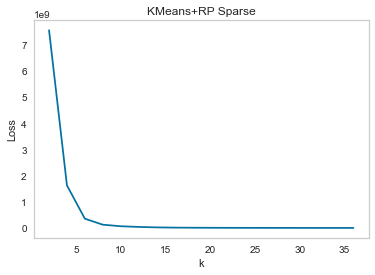

In [62]:
plt.figure()
plt.plot(k_grid_rps, loss_rps)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+RP Sparse')
plt.grid()

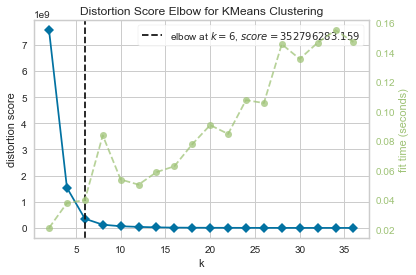

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [63]:
model_rps = KMeans()
visualizer_rps = KElbowVisualizer(model_rps, k=k_grid_rps)

visualizer_rps.fit(X_rps)
visualizer_rps.show()

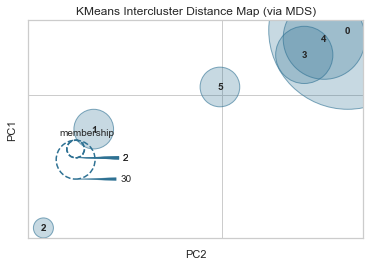

In [64]:
kmeans = KMeans(n_clusters=6, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_rps)
visualizer.finalize()

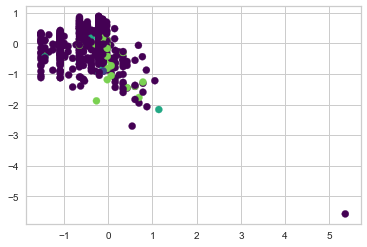

In [65]:
labels_rps=kmeans.predict(X_rps)
plt.scatter(X_rps[:, 0], X_rps[:, 1], c=labels_rps, s=50, cmap='viridis')

### KMeans + RP Gaussian 

In [66]:
k_grid_rpg = np.arange(2, 38, 2)
loss_rpg = np.zeros(k_grid_rpg.size)
sil_score_rpg = np.zeros(k_grid_rpg.size)
for idx, k in enumerate(k_grid_rpg):
    print ("k = ", k)
    kmeans = KMeans(n_clusters=k, random_state=random_seed)
    kmeans.fit(X_rpg)
    labels_rpg=kmeans.predict(X_rpg)
    loss_rpg[idx] = kmeans.inertia_
    sil_score_rpg[idx] = silhouette_score(X_rpg, labels_rpg, metric='euclidean')

k =  2
k =  4
k =  6
k =  8
k =  10
k =  12
k =  14
k =  16
k =  18
k =  20
k =  22
k =  24
k =  26
k =  28
k =  30
k =  32
k =  34
k =  36


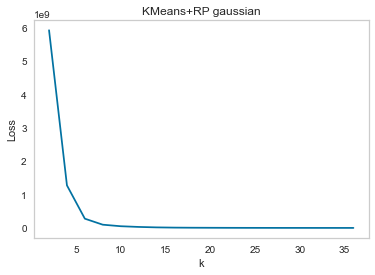

In [67]:
plt.figure()
plt.plot(k_grid_rpg, loss_rpg)
# plt.xticks(k_grid)
plt.xlabel('k')
plt.ylabel('Loss')
plt.title('KMeans+RP gaussian')
plt.grid()

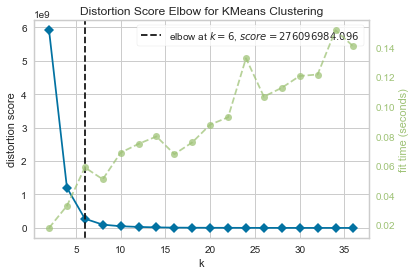

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [68]:
model_rpg = KMeans()
visualizer_rpg = KElbowVisualizer(model_rpg, k=k_grid_rpg)

visualizer_rpg.fit(X_rpg)
visualizer_rpg.show()

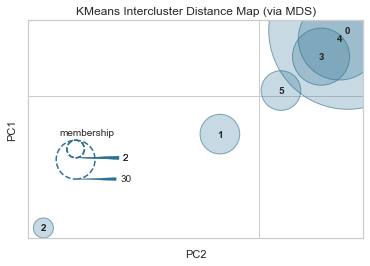

In [69]:
kmeans = KMeans(n_clusters=6, algorithm="full", random_state=random_seed)
visualizer = InterclusterDistance(kmeans)
visualizer.fit(X_rpg)
visualizer.finalize()

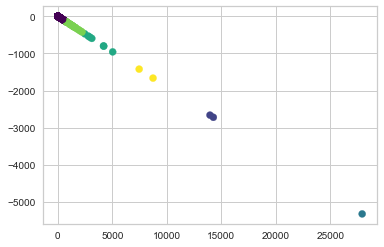

In [70]:
labels_rpg=kmeans.predict(X_rpg)
plt.scatter(X_rpg[:, 0], X_rpg[:, 1], c=labels_rpg, s=50, cmap='viridis')

## EM + DR 

### EM + PCA 

In [71]:
n_clusters_pca=np.arange(2, 6, 1)
bics_pca=[]
bics_err_pca=[]
iterations=20
for n in n_clusters_pca:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_pca) 
        
        tmp_bic.append(gmm.bic(X_pca))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_pca.append(val)
    bics_err_pca.append(err)

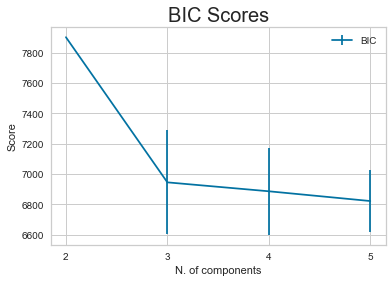

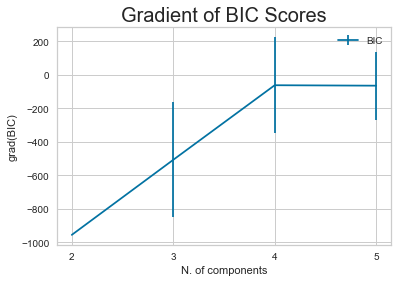

<Figure size 432x288 with 0 Axes>

In [72]:
plt.errorbar(n_clusters_pca,bics_pca, yerr=bics_err_pca, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_pca)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_pca, np.gradient(bics_pca), yerr=bics_err_pca, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_pca)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [73]:
n=3
gmm_pca=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_pca)
y_gmm_pca = gmm_pca.fit_predict(X_pca)

Text(0, 0.5, 'PC2')

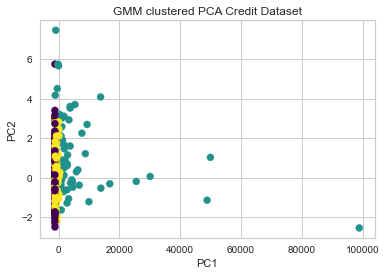

In [74]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_gmm_pca, s=50, cmap='viridis')
plt.title("GMM clustered PCA Credit Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")

### EM + ICA 

In [75]:
n_clusters_ica=np.arange(2, 32, 2)
bics_ica=[]
bics_err_ica=[]
iterations=20
for n in n_clusters_ica:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_ica) 
        
        tmp_bic.append(gmm.bic(X_ica))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_ica.append(val)
    bics_err_ica.append(err)

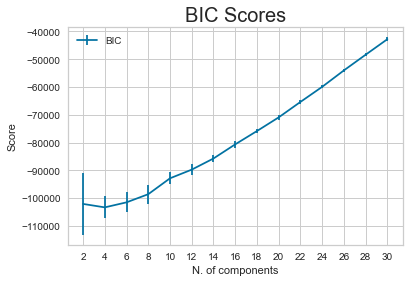

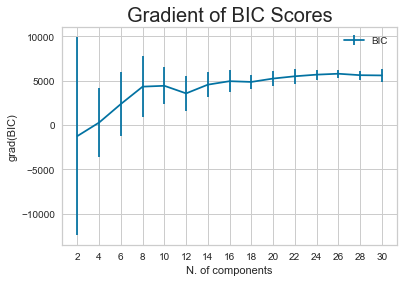

<Figure size 432x288 with 0 Axes>

In [76]:
plt.errorbar(n_clusters_ica,bics_ica, yerr=bics_err_ica, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_ica)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_ica, np.gradient(bics_ica), yerr=bics_err_ica, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_ica)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [77]:
n=4
gmm_ica=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_ica)
y_gmm_ica = gmm_ica.fit_predict(X_ica)

Text(0, 0.5, 'IC2')

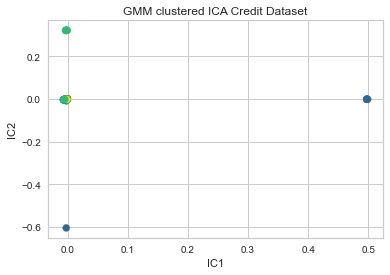

In [78]:
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y_gmm_ica, s=50, cmap='viridis')
plt.title("GMM clustered ICA Credit Dataset")
plt.xlabel("IC1")
plt.ylabel("IC2")

### EM + RP Sparse

In [79]:
n_clusters_rps=np.arange(2, 38, 2)
bics_rps=[]
bics_err_rps=[]
iterations=20
for n in n_clusters_rps:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_rps) 
        
        tmp_bic.append(gmm.bic(X_rps))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_rps.append(val)
    bics_err_rps.append(err)

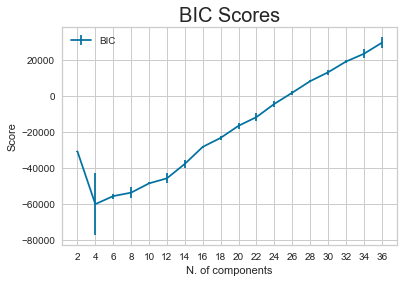

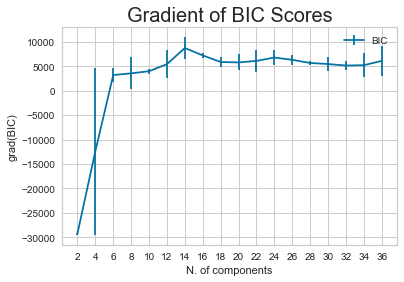

<Figure size 432x288 with 0 Axes>

In [80]:
plt.errorbar(n_clusters_rps,bics_rps, yerr=bics_err_rps, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_rps)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_rps, np.gradient(bics_rps), yerr=bics_err_rps, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_rps)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [81]:
n=4
gmm_rps=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_rps)
y_gmm_rps = gmm_rps.fit_predict(X_rps)

Text(0, 0.5, 'C2')

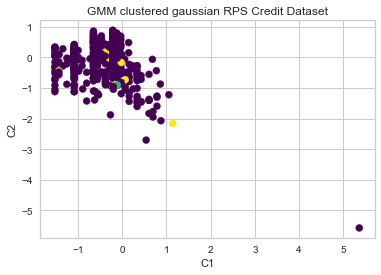

In [82]:
plt.scatter(X_rps[:, 0], X_rps[:, 1], c=y_gmm_rps, s=50, cmap='viridis')
plt.title("GMM clustered gaussian RPS Credit Dataset")
plt.xlabel("C1")
plt.ylabel("C2")

### EM + RPG 

In [83]:
n_clusters_rpg=np.arange(2, 38, 2)
bics_rpg=[]
bics_err_rpg=[]
iterations=20
for n in n_clusters_rpg:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(X_rpg) 
        
        tmp_bic.append(gmm.bic(X_rpg))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics_rpg.append(val)
    bics_err_rpg.append(err)

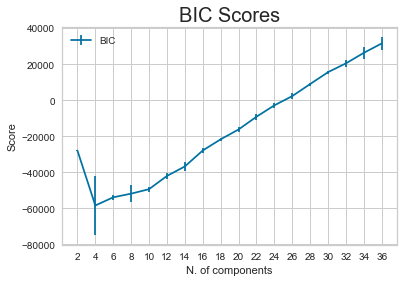

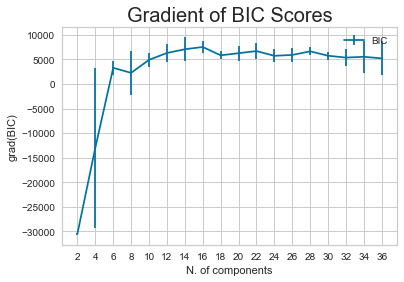

<Figure size 432x288 with 0 Axes>

In [84]:
plt.errorbar(n_clusters_rpg,bics_rpg, yerr=bics_err_rpg, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters_rpg)
plt.xlabel("N. of components")
plt.ylabel("Score")
plt.legend()
plt.show()
plt.clf()
    
plt.errorbar(n_clusters_rpg, np.gradient(bics_rpg), yerr=bics_err_rpg, label='BIC')
plt.title("Gradient of BIC Scores", fontsize=20)
plt.xticks(n_clusters_rpg)
plt.xlabel("N. of components")
plt.ylabel("grad(BIC)")
plt.legend()
plt.show()
plt.clf()

In [85]:
n=4
gmm_rpg=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_rpg)
y_gmm_rpg = gmm_rpg.fit_predict(X_rpg)

Text(0, 0.5, 'C2')

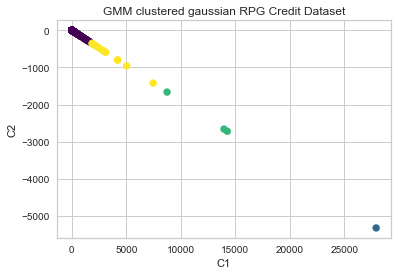

In [86]:
plt.scatter(X_rpg[:, 0], X_rpg[:, 1], c=y_gmm_rpg, s=50, cmap='viridis')
plt.title("GMM clustered gaussian RPG Credit Dataset")
plt.xlabel("C1")
plt.ylabel("C2")

## NN + DR 

In [87]:
param_grid = {
        'activation':['relu'],
        'alpha': np.arange(0.5, 2.1, 0.2),
        'hidden_layer_sizes': [(0), (2), (8), (16), (32), (64), (96), (128)], #[(32), (64), (64, 64), (128), (128,128)], #, (32, 64, 32), (64, 128, 64)],
        'learning_rate_init': [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
      }

### NN + PCA 

In [88]:
base_clf_pca = MLPClassifier(random_state=random_seed)
base_clf_pca.fit(X_pca, y_train_c)
y_train_pred_pca = base_clf_pca.predict(X_pca)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_pca))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.6631985421728567


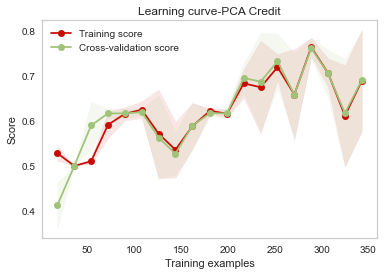

In [89]:
plot_learning_curve(base_clf_pca, "Learning curve-PCA Credit", X_pca, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [90]:
grid_search_pca = GridSearchCV(base_clf_pca, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_pca.fit(X_pca, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0149s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0718s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1396s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1974s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 259 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 315 ta

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [91]:
print (grid_search_pca.best_estimator_)
print (grid_search_pca.best_score_)

MLPClassifier(alpha=0.5, hidden_layer_sizes=128, random_state=42)
0.7450313943907299


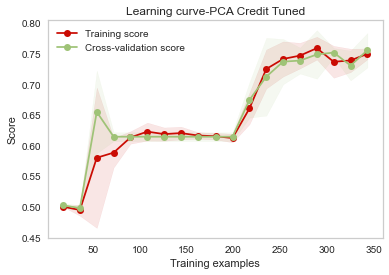

In [92]:
plot_learning_curve(grid_search_pca.best_estimator_, "Learning curve-PCA Credit Tuned", X_pca, y_train_c, ylim=None, cv=4, n_jobs=-1)

### NN + ICA

In [93]:
base_clf_ica = MLPClassifier(random_state=random_seed)
base_clf_ica.fit(X_ica, y_train_c)
y_train_pred_ica = base_clf_ica.predict(X_ica)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_ica))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.8984380423464076


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


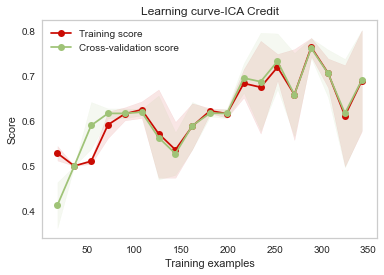

In [94]:
plot_learning_curve(base_clf_ica, "Learning curve-ICA Credit", X_pca, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [95]:
grid_search_ica = GridSearchCV(base_clf_ica, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_ica.fit(X_ica, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0145s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0748s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  60 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0511s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1928s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 239 ta

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [96]:
print (grid_search_ica.best_estimator_)
print (grid_search_ica.best_score_)

MLPClassifier(alpha=1.0999999999999999, hidden_layer_sizes=16,
              learning_rate_init=0.1, random_state=42)
0.8919546658739843


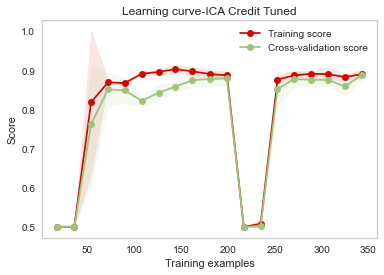

In [97]:
plot_learning_curve(grid_search_ica.best_estimator_, "Learning curve-ICA Credit Tuned", X_ica, y_train_c, ylim=None, cv=4, n_jobs=-1)

### NN + RP Sparse 

In [98]:
base_clf_rps = MLPClassifier(random_state=random_seed)
base_clf_rps.fit(X_rps, y_train_c)
y_train_pred_rps = base_clf_rps.predict(X_rps)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_rps))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7688649774383894


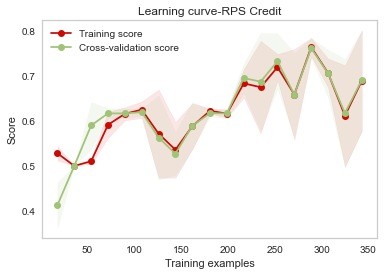

In [99]:
plot_learning_curve(base_clf_rps, "Learning curve-RPS Credit", X_pca, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [100]:
grid_search_rps = GridSearchCV(base_clf_rps, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_rps.fit(X_rps, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0055s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0469s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2254s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1814s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 245 ta

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [101]:
print (grid_search_rps.best_estimator_)
print (grid_search_rps.best_score_)

MLPClassifier(alpha=1.8999999999999997, hidden_layer_sizes=96,
              learning_rate_init=0.01, random_state=42)
0.7943686963505324


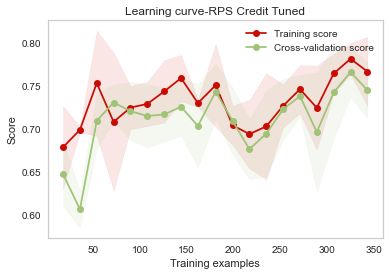

In [102]:
plot_learning_curve(grid_search_rps.best_estimator_, "Learning curve-RPS Credit Tuned", X_rps, y_train_c, ylim=None, cv=4, n_jobs=-1)

### NN + RP Gaussian 

In [103]:
base_clf_rpg = MLPClassifier(random_state=random_seed)
base_clf_rpg.fit(X_rpg, y_train_c)
y_train_pred_rpg = base_clf_rpg.predict(X_rpg)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_rpg))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.737096494272822


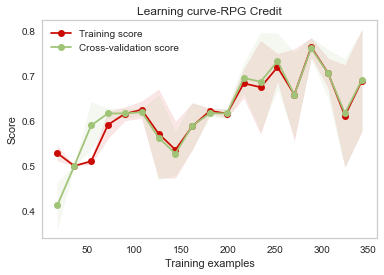

In [104]:
plot_learning_curve(base_clf_rpg, "Learning curve-RPG Credit", X_pca, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [105]:
grid_search_rpg = GridSearchCV(base_clf_rpg, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_rpg.fit(X_rpg, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0125s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0578s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1975s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0076s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 259 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 293 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 308 ta

GridSearchCV(cv=4, estimator=MLPClassifier(random_state=42), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [106]:
print (grid_search_rpg.best_estimator_)
print (grid_search_rpg.best_score_)

MLPClassifier(alpha=1.4999999999999998, hidden_layer_sizes=16,
              learning_rate_init=0.01, random_state=42)
0.7383294481471052


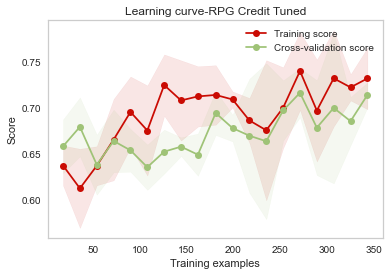

In [107]:
plot_learning_curve(grid_search_rpg.best_estimator_, "Learning curve-RPG Credit Tuned", X_rpg, y_train_c, ylim=None, cv=4, n_jobs=-1)

## NN + Clustering 

### NN + KMeans 

In [125]:
kmeans = KMeans(n_clusters=6, init ='k-means++', max_iter=300, n_init=10,random_state=random_seed)
y_kmeans = kmeans.fit_predict(X_train_c)
y_kmeans_test = kmeans.predict(X_test_c)

In [109]:
#df = pd.DataFrame(data=y_kmeans, columns=["labels"])
X_train_c_km = X_train_c.copy()
X_train_c_km['labels'] = y_kmeans

In [110]:
base_clf_km = MLPClassifier()
base_clf_km.fit(X_train_c_km, y_train_c)
y_train_pred_km = base_clf_km.predict(X_train_c_km)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_km))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7083998611593196


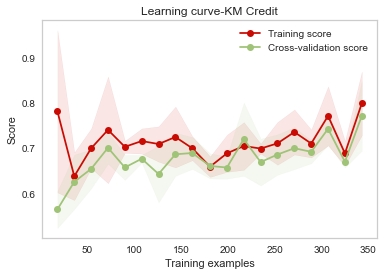

In [111]:
plot_learning_curve(base_clf_km, "Learning curve-KM Credit", X_train_c_km, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [112]:
grid_search_km = GridSearchCV(base_clf_km, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_km.fit(X_train_c_km, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0140s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0957s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0100s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 203 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1936s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 218 ta

GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [113]:
print (grid_search_km.best_estimator_)
print (grid_search_km.best_score_)

MLPClassifier(alpha=1.6999999999999997, hidden_layer_sizes=16)
0.8245193059857943


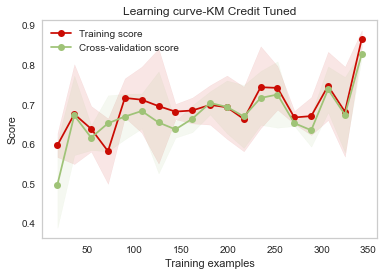

In [114]:
plot_learning_curve(grid_search_km.best_estimator_, "Learning curve-KM Credit Tuned", X_train_c_km, y_train_c, ylim=None, cv=4, n_jobs=-1)

### NN + EM 

In [134]:
#X_test_c_gmm = gmm.predict(X_test_c)
gmm=GaussianMixture(n, n_init=10, random_state=random_seed).fit(X_train_c)
y_test_c_gmm = gmm.predict(X_test_c)
#print (gmm.n_components)

In [115]:
X_train_c_gmm = X_train_c.copy()
X_train_c_gmm['labels'] = y_gmm

In [116]:
base_clf_gmm = MLPClassifier()
base_clf_gmm.fit(X_train_c_gmm, y_train_c)
y_train_pred_gmm = base_clf_km.predict(X_train_c_gmm)
#y_test_pred = base_clf.predict(X_test)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_gmm))
#print("Test Accuracy: ", balanced_accuracy_score(y_test, y_test_pred))

Train Accuracy:  0.7395262061784103


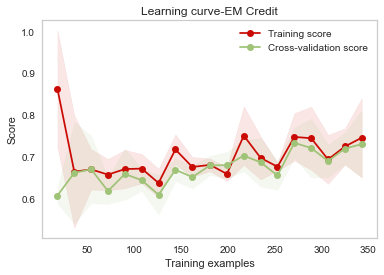

In [117]:
plot_learning_curve(base_clf_gmm, "Learning curve-EM Credit", X_train_c_gmm, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [118]:
grid_search_gmm = GridSearchCV(base_clf_gmm, param_grid= param_grid, cv=4, scoring=make_scorer(balanced_accuracy_score), verbose=10, n_jobs=-1)
grid_search_gmm.fit(X_train_c_gmm, y_train_c)

Fitting 4 folds for each of 448 candidates, totalling 1792 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0134s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0698s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1421s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 227 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1819s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done 251 ta

GridSearchCV(cv=4, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9]),
                         'hidden_layer_sizes': [0, 2, 8, 16, 32, 64, 96, 128],
                         'learning_rate_init': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01, 0.1, 1]},
             scoring=make_scorer(balanced_accuracy_score), verbose=10)

In [119]:
print (grid_search_gmm.best_estimator_)
print (grid_search_gmm.best_score_)

MLPClassifier(alpha=1.4999999999999998, hidden_layer_sizes=8)
0.8292617103163429


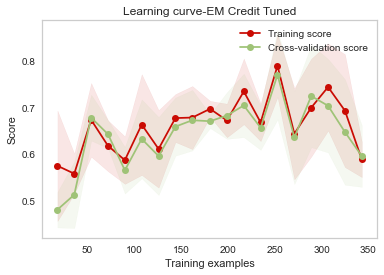

In [120]:
plot_learning_curve(grid_search_gmm.best_estimator_, "Learning curve-EM Credit Tuned", X_train_c_gmm, y_train_c, ylim=None, cv=4, n_jobs=-1)

In [121]:
best_clf_pca = MLPClassifier(alpha=0.5, hidden_layer_sizes=128, random_state=42)
best_clf_pca.fit(X_pca, y_train_c)
print (X_pca.shape)
X_test_pca=pca.transform(X_test_c)
print (X_test_pca.shape)
y_train_pred_pca = best_clf_pca.predict(X_pca)
y_test_pred_pca = best_clf_pca.predict(X_test_pca)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_pca))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_pca))

(483, 2)
(207, 2)
Train Accuracy:  0.7134154807358556
Test Accuracy:  0.7097826086956521


In [122]:
best_clf_ica = MLPClassifier(alpha=1.0999999999999999, hidden_layer_sizes=16,
              learning_rate_init=0.1, random_state=42)
best_clf_ica.fit(X_ica, y_train_c)
print (X_ica.shape)
X_test_ica=ica.transform(X_test_c)
print (X_test_ica.shape)
y_train_pred_ica = best_clf_ica.predict(X_ica)
y_test_pred_ica = best_clf_ica.predict(X_test_ica)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_ica))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_ica))

(483, 31)
(207, 31)
Train Accuracy:  0.8830006942034017
Test Accuracy:  0.8271739130434783


In [123]:
best_clf_rps = MLPClassifier(alpha=1.8999999999999997, hidden_layer_sizes=96,
              learning_rate_init=0.01, random_state=42)
best_clf_rps.fit(X_rps, y_train_c)
print (X_rps.shape)
X_test_rps=rps.transform(X_test_c)
print (X_test_rps.shape)
y_train_pred_rps = best_clf_rps.predict(X_rps)
y_test_pred_rps = best_clf_rps.predict(X_test_rps)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_rps))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_rps))

(483, 32)
(207, 32)
Train Accuracy:  0.6203661922943422
Test Accuracy:  0.566304347826087


In [124]:
best_clf_rpg = MLPClassifier(alpha=1.4999999999999998, hidden_layer_sizes=16,
              learning_rate_init=0.01, random_state=42)
best_clf_rpg.fit(X_rpg, y_train_c)
print (X_rpg.shape)
print (X_test_c.shape)
print (rpg.components_.shape)
X_test_rpg=rpg.transform(X_test_c)
print (X_test_rpg.shape)
y_train_pred_rpg = best_clf_rpg.predict(X_rpg)
y_test_pred_rpg = best_clf_rpg.predict(X_test_rpg)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_rpg))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_rpg))

(483, 32)
(207, 37)
(32, 37)
(207, 32)
Train Accuracy:  0.7245227351614023
Test Accuracy:  0.7478260869565218


In [126]:
X_test_c_km = X_test_c.copy()
X_test_c_km['labels'] = y_kmeans_test

In [127]:
best_clf_km = MLPClassifier(alpha=1.6999999999999997, hidden_layer_sizes=16)
best_clf_km.fit(X_train_c_km, y_train_c)
y_train_pred_km = best_clf_km.predict(X_train_c_km)
y_test_pred_km = best_clf_km.predict(X_test_c_km)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_km))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_km))

Train Accuracy:  0.6846060395695939
Test Accuracy:  0.7532608695652174


In [135]:
X_test_c_gmm = X_test_c.copy()
X_test_c_gmm['labels'] = y_test_c_gmm

In [136]:
best_clf_gmm = MLPClassifier(alpha=1.4999999999999998, hidden_layer_sizes=8)
best_clf_gmm.fit(X_train_c_gmm, y_train_c)
y_train_pred_gmm = best_clf_gmm.predict(X_train_c_gmm)
y_test_pred_gmm = best_clf_gmm.predict(X_test_c_gmm)
print("Train Accuracy: ", balanced_accuracy_score(y_train_c, y_train_pred_gmm))
print("Test Accuracy: ", balanced_accuracy_score(y_test_c, y_test_pred_gmm))

Train Accuracy:  0.8751822283929191
Test Accuracy:  0.8152173913043479


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


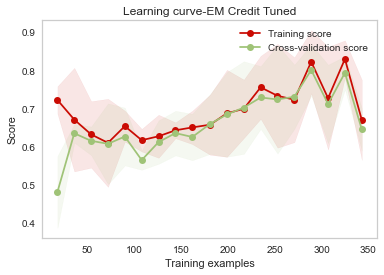

In [137]:
plot_learning_curve(best_clf_gmm, "Learning curve-EM Credit Tuned", X_train_c_gmm, y_train_c, ylim=None, cv=4, n_jobs=-1)